# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_0 = np.eye(2)
tau_x = np.array([[0, 1], [1, 0]], dtype=complex)
tau_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
tau_z = np.array([[1, 0], [0, -1]], dtype=complex)

# 2D chern insulator

In [ ]:
#Periodic-open
# Parameters
L = 30
kys =np.linspace(-np.pi, np.pi, 99)
m = 1

eigvals_oc_vs_ky = []

for ky in kys:
    H0 = np.sin(ky) * sigma_y + (m - np.cos(ky)) * sigma_z
    V = (-1j / 2) * sigma_x + (1 / 2) * sigma_z
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_ky.append(eigenvals_oc)

eigvals_oc_vs_ky = np.array(eigvals_oc_vs_ky).T


plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_ky:
    plt.plot(kys, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kys, eigvals_oc_vs_ky[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_y$')
plt.ylabel('Energy')
plt.show()


In [ ]:
#Periodic-periodic
# Parameters
m = 1
Nk = 99
kx_vals = np.linspace(-np.pi, np.pi, Nk, endpoint = False)
ky_vals = np.linspace(-np.pi, np.pi, Nk, endpoint = False)
KX, KY = np.meshgrid(kx_vals, ky_vals)



band1 = np.zeros((Nk, Nk))
band2 = np.zeros((Nk, Nk))

# Energy bands
for i in range(Nk):
    for j in range(Nk):
        kx, ky = kx_vals[i], ky_vals[j]
        Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
        eigvals = np.linalg.eigvalsh(Hk)
        band1[j, i] = eigvals[0]
        band2[j, i] = eigvals[1]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX, KY, band1, cmap='coolwarm', edgecolor='none', alpha=0.9, label='Lower Band')
ax.plot_surface(KX, KY, band2, cmap='viridis', edgecolor='none', alpha=0.9, label='Upper Band')

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy')
plt.tight_layout()
plt.show()


In [ ]:
chern_n = []
Nk = 101
ms = np.linspace(-4, 4, 100)

kx_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
ky_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)

for m in ms:
    # Compute eigenvectors on grid
    eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
    for i in range(Nk):
        for j in range(Nk):
            kx, ky = kx_vals[i], ky_vals[j]
            Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
            _, evecs = np.linalg.eigh(Hk)
            eigvecs[i, j, :] = evecs[:, 0]  # Lower band

    # Compute Berry curvature F for this m
    F = np.zeros((Nk - 1, Nk - 1))
    for i in range(Nk - 1):
        for j in range(Nk - 1):
            u = eigvecs[i, j]
            u_x = eigvecs[i + 1, j]
            u_y = eigvecs[i, j + 1]
            u_xy = eigvecs[i + 1, j + 1]

            Ux = np.vdot(u, u_x)
            Uy = np.vdot(u, u_y)
            Uxy = np.vdot(u_x, u_xy)
            Uyx = np.vdot(u_y, u_xy)

            # Normalize link variables to unit magnitude (pure phase)
            Ux /= np.abs(Ux)
            Uy /= np.abs(Uy)
            Uxy /= np.abs(Uxy)
            Uyx /= np.abs(Uyx)

            F[i, j] = np.angle(Ux * Uxy * np.conj(Uyx) * np.conj(Uy))

    # Compute Chern number
    chern = np.sum(F) / (2 * np.pi)
    chern_n.append(chern)

plt.scatter (ms, chern_n)
plt.xlabel ('m')
plt.ylabel ('C')
plt.grid (True)
plt.show ()


In [ ]:
plt.plot (ms, np.round(np.array(chern_n)))
plt.xlabel ('m')
plt.ylabel ('C')
plt.grid (True)
plt.show ()

In [ ]:
from matplotlib import cm

KX_plot, KY_plot = np.meshgrid(kx_vals[:-1], ky_vals[:-1])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(KX_plot, KY_plot, F.T, cmap='coolwarm', edgecolor='none', alpha=0.9)

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Berry Curvature $F_{xy}$')
ax.set_title('Berry Curvature Surface (Lower Band)')

fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, label='Berry Curvature')
plt.tight_layout()
plt.show()


In [ ]:
#periodic-periodic when k = 0 / 2D visualization for comparison purposes

# Parameters
m = 2
Nk = 99
kx = 0.0  # fixed kx
kys = np.linspace(-np.pi, np.pi, Nk)
bands = []

for ky in kys:
    Hk = np.sin(kx)*sigma_x + np.sin(ky)*sigma_y + (m - np.cos(kx) - np.cos(ky))*sigma_z
    eigvals = np.linalg.eigvalsh(Hk)
    bands.append(eigvals)

bands = np.array(bands).T

# Plot
plt.figure(figsize=(6,4))
for band in bands:
    plt.plot(kys, band, color='black', linewidth=1)
plt.xlabel('$k_y$')
plt.ylabel('Energy')
plt.title(f'Periodic-Periodic QWZ Band Structure (fixed $k_x$={kx})')
plt.grid(True)
plt.show()


In [ ]:
#Wilson loop

# Parameters
Nk = 100 
delta_k = 2 * np.pi / Nk
k_vals = np.linspace(0, 2*np.pi, Nk, endpoint=False)

# Chern insulator
def hamiltonian(kx, ky, M):
    sx = np.array([[0, 1], [1, 0]])
    sy = np.array([[0, -1j], [1j, 0]])
    sz = np.array([[1, 0], [0, -1]])
    I = np.eye(2)
    H = np.sin(kx) * sx + np.sin(ky) * sy + (M + np.cos(kx) + np.cos(ky)) * sz
    return H

# Wilson loop operator
def wilson_loop(kx_fixed, M):
    overlaps = []
    for i in range(Nk):
        ky1 = k_vals[i]
        ky2 = k_vals[(i+1) % Nk]
        H1 = hamiltonian(kx_fixed, ky1, M)
        H2 = hamiltonian(kx_fixed, ky2, M)
        _, v1 = np.linalg.eigh(H1)
        _, v2 = np.linalg.eigh(H2)
       
        
        u1 = v1[:, 0] #lwoest band only (0) because we're interested in the occ. band
        u2 = v2[:, 0]
        overlap = np.vdot(u1, u2)
        overlaps.append(overlap)
    
    W = np.prod(overlaps) 
    
    return np.angle(W)

# Wilson loop phases
kx_vals = np.linspace(-np.pi, np.pi, 100)
phases = [wilson_loop(kx,2) for kx in kx_vals]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(kx_vals, np.unwrap(phases))
plt.xlabel("$k_x$")
plt.ylabel("Wilson loop phase")
plt.grid(True)
plt.tight_layout()
plt.show()


# Weyl Semimetals

In [ ]:
# Weyl Semimetal band structure

# Parameters
t0, t, V=0, 1, 3
Nk = 1001

kz_vals = np.linspace(-np.pi, np.pi, Nk)
kx, ky = 0,0

# Hamiltonian and diagonalization
energies = []
for kz in kz_vals:
    Hk = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.sin(ky)) * sigma_y + (2*t*np.cos(kz)+2*t*(2-np.cos(kx)-np.cos(ky))-V)* sigma_z
    eigvals = np.linalg.eigvalsh(Hk)
    energies.append(eigvals)

energies = np.array(energies).T

# Plot
plt.figure (figsize=(8,5))
for E in energies:
    plt.plot(kz_vals, E)
plt.xlabel('$k_z$')
plt.ylabel('$E$')
plt.title('Weyl Semimetal Band Structure')
plt.grid(True)
plt.show()


In [ ]:
chern_n = []
t0, t, V = 0, 1, 3

Nk = 99

kx_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
ky_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)

kz = 0

energies = []
# Compute eigenvectors on grid
eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
for i in range(Nk):
    for j in range(Nk):
        kx, ky = kx_vals[i], ky_vals[j]
        Hk = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.sin(ky)) * sigma_y + (2*t*np.cos(kz)+2*t*(2-np.cos(kx)-np.cos(ky))-V)* sigma_z
        _, evecs = np.linalg.eigh(Hk)
        eigvecs[i, j, :] = evecs[:, 0]  # Lower band

# Compute Berry curvature F for this m
F = np.zeros((Nk - 1, Nk - 1))
for i in range(Nk - 1):
    for j in range(Nk - 1):
        u = eigvecs[i, j]
        u_x = eigvecs[i + 1, j]
        u_y = eigvecs[i, j + 1]
        u_xy = eigvecs[i + 1, j + 1]

        Ux = np.vdot(u, u_x)
        Uy = np.vdot(u, u_y)
        Uxy = np.vdot(u_x, u_xy)
        Uyx = np.vdot(u_y, u_xy)

            # Normalize link variables to unit magnitude (pure phase)
        Ux /= np.abs(Ux)
        Uy /= np.abs(Uy)
        Uxy /= np.abs(Uxy)
        Uyx /= np.abs(Uyx)

        F[i, j] = np.angle(Ux * Uxy * np.conj(Uyx) * np.conj(Uy))

    # Compute Chern number
chern = np.sum(F) / (2 * np.pi)

print ("chern number is:", chern)

In [ ]:
#Periodic-open

#Parameters
L = 40
t0, t, V=0, 1, 3

kzs = np.linspace(-np.pi,np.pi, 99)
kx = 0

#Hamiltonian and diagonalization
eigvals_oc_vs_kz = []
for kz in kzs:
    H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(2-np.cos(kx))-V)* sigma_z
    V0 = -1j*t * sigma_y +t*sigma_z
    
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kz.append(eigenvals_oc)

eigvals_oc_vs_kz = np.array(eigvals_oc_vs_kz).T

#Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_z$')
plt.ylabel('Energy')
plt.show()


In [ ]:
#Edge modes

# Parameters
L = 40
t0, t, V = 0,1,3

kz = 0
kxs = np.linspace(-np.pi,np.pi, 99)


eigvals_oc_vs_kx = []

# Hamiltonian
for kx in kxs:
    H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(2-np.cos(kx))-V)* sigma_z
    V0 = -1j*t * sigma_y +t*sigma_z
    
    # Diagonalization 
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kx.append(eigenvals_oc)

eigvals_oc_vs_kx = np.array(eigvals_oc_vs_kx).T

#Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kx:
    plt.plot(kxs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kxs, eigvals_oc_vs_kx[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()


# Fermi arcs

In [ ]:
#Periodic-open
# Parameters
L = 40
t0, t, V = 0,1, 3

kzs = np.linspace(-np.pi,np.pi, 99)
kxs = np.linspace(-np.pi,np.pi, 99)
XX, ZZ = np.meshgrid (kxs, kzs)

eigvals_oc_vs_kz = []
# Hamiltonian
for kz in kzs:
    for kx in kxs:
        H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(np.cos(kx))-V)* sigma_z
        V0 = -1j*t * sigma_y +t*sigma_z
        
    
    # Diagonalization 
        H_open = np.zeros((2*L, 2*L), dtype=complex)
        for i in range(L):
            H_open[2*i:2*i+2, 2*i:2*i+2] = H0
            if i < L - 1:
                H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
                H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
        eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
        eigvals_oc_vs_kz.append(eigenvals_oc.real)

arr = np.array(eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kxs), 2*L)

near_zero_band = arr_reshaped[:, :, :]

#Plot
plt.figure(figsize=(8,6))
for band in range (2*L):
    plt.contour(XX, ZZ, arr_reshaped[:, :, band], [-0.6,-0.4,-0.2] )
plt.colorbar(label=f'E' )
plt.xlabel('$k_x$')
plt.ylabel('$k_z$')
plt.title('Fermi arcs')
plt.show()

# Landau Levels

In [ ]:
#2D - OBC in x direction 

# Parameters
L = 40
kys =np.linspace(-np.pi, np.pi, 501)
m = 2
eigvals_oc_vs_ky = []


for ky in kys:
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H0 = np.sin(ky) * sigma_y + (m - np.cos(ky)) * sigma_z
        V = (1j / 2) * sigma_x - (1 / 2) * sigma_z 
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L-1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V.conj().T
        else:
            H_open[2*i:2*i+2, 0:2] = V
            H_open[0:2, 2*i:2*i+2] = V.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_ky.append(eigenvals_oc)

eigvals_oc_vs_ky = np.array(eigvals_oc_vs_ky).T

fig, ax = plt.subplots(figsize=(8,6))
for band in eigvals_oc_vs_ky:
    ax.plot (kys, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 2D chern insulator - OBC in x direction')
ax.set_xlim (-1,1)
ax.set_ylim (-1,1)

mid = L
for b in [mid-1, mid]:
    plt.plot(kys, eigvals_oc_vs_ky[b], color='red', linewidth =0.5)

plt.show()


In [ ]:
# Parameters
e = 1

L = 40
t0, t, V = 0,1,3
B= 2*np.pi/L

kzs =np.linspace(-np.pi, np.pi, 501)
kx, ky = 0,0

#Hamiltonian and diagonalization
eigvals_oc_vs_kz = []
for kz in kzs:
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H0 = (-2*t0*np.sin(kx+e*B*i))*I2 +(2*t*np.sin(kx+e*B*i))* sigma_x + (2*t*np.cos(kz)+2*t*(np.cos(kx+e*B*i))-V)* sigma_z
        V0 = -1j*t * sigma_y +t*sigma_z
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L-1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
        else:
            H_open[2*i:2*i+2, 0:2] = V0
            H_open[0:2, 2*i:2*i+2] = V0.conj().T

    
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kz.append(eigenvals_oc)

eigvals_oc_vs_kz = np.array(eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,6))
for band in eigvals_oc_vs_kz:
    ax.plot (kzs, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM - OBC in y direction')

#ax.set_xlim (1,5.5)
#ax.set_ylim (-2,2)
plt.plot(kzs, eigvals_oc_vs_kz[39], color='red', linewidth =0.5)

#===============================
#Analytics

#ladder operators
a = ((kx+e*B*i) - 1j*ky)/np.sqrt(2*e*B)
a_dagger = ((kx+e*B*i) + 1j*ky)/np.sqrt(2*e*B)

#matrices
sigma_minus = 1/2*(sigma_x - 1j*sigma_y)
sigma_plus = 1/2*(sigma_x + 1j*sigma_y)

tau_plus = 1/2*(sigma_x - 1j*sigma_y)
tau_minus = 1/2*(sigma_x + 1j*sigma_y)

ns = range (19)

evals =[]
for i in range (L):
    for kz in kzs:        
        Hk = (-2*t0*(kx+e*B*i))*I2 +2*t*np.sqrt(2*e*B)*(a*sigma_plus + a_dagger*sigma_minus)+ (2*t*np.cos(kz)+(2*t*e*B*(a_dagger*a+0.5))-V)* sigma_z
        eigvals = np.linalg.eigvalsh(Hk)
        evals.append(eigvals)

evals = np.array(evals).T
evals_reshaped = evals.reshape(2*L, len(kzs))

#for band in range (2*L):
   #plt.plot(kzs, evals_reshaped[band], color='blue', linewidth =0.5)

#plt.plot(kzs, evals_reshaped[39], color = 'blue', linewidth = 0.5)

plt.show()


# 4 Band

In [ ]:
# 2D - PBC 

# Parameters
m = 2     
M_split = 2  # splitting between the two copies

Nkx = 501
kx_vals = np.linspace(-np.pi, np.pi, Nkx)
ky = 0.0

energies4 = []
for kx in kx_vals:
    # 2×2 Chern insulator Hamiltonian H2
    H2 = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z

    # 4×4: two copies of H2
    H4 = np.kron(H2, tau_0) + M_split * np.kron(I2, tau_z)

    # Diagonalize
    eigs = np.linalg.eigvalsh(H4)
    energies4.append(eigs)

energies4 = np.array(energies4).T

# Plot
plt.figure(figsize=(8, 5))
for band in range(4):
    plt.plot(kx_vals, energies4[band], label=f'Band {band+1}')
plt.xlabel(r'$k_x$')
plt.ylabel('Energy')
plt.title('4‑Band 2D - $K_y$=0')
plt.tight_layout()
plt.show()


In [ ]:
#3D - PBC

# Paramaeters
t0, t, V = 0.0, 1.0, 3.0
iM = 2 #splitting

Nk = 501
kz_vals = np.linspace(-np.pi, np.pi, Nk)
kx = 0.0 
ky = 0.0
energies4 = []

for kz in kz_vals:
    # 2×2 Hamiltonian
    H2 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.sin(ky)) * sigma_y + (2*t*np.cos(kz)+2*t*(2-np.cos(kx)-np.cos(ky))-V)* sigma_z
    # 4×4 two copies +/- M
    H4 = np.kron(H2, tau_0) + iM * np.kron(I2, tau_z) 

    eigs = np.linalg.eigvalsh(H4)
    energies4.append(eigs)

energies4 = np.array(energies4).T

# Plot 
plt.figure(figsize=(8,5))
for E in energies4:
    plt.plot(kz_vals, E)
plt.xlabel('$k_z$')
plt.ylabel('$E$')
plt.title('4‐Band 3D - $K_y$, $K_x$ = 0')
plt.show()

In [ ]:
#3D - OBC in y direction

# Parameters
t0, t, V = 0.0, 1.0, 3.0 
iM = 0.5
L = 40
kx = 0

Nkz = 99
kz_vals = np.linspace(0, 2*np.pi, Nkz)

V0_2 = -1j*t * sigma_y +t*sigma_z
V0_4 = np.kron(V0_2, tau_0)  

energies_slab = []

# Hamiltonian
for kz in kz_vals:
    H2_onsite = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(2-np.cos(kx))-V)* sigma_z
    H0_4 = np.kron(H2_onsite, tau_0) + iM * np.kron(I2, tau_z)
    H_slab = np.zeros((4*L, 4*L), dtype=complex)
    
    for j in range(L):
        sl = slice(4*j, 4*(j+1))
        H_slab[sl, sl] = H0_4
    
    for j in range(L - 1):
        sl_j = slice(4*j, 4*(j+1))
        sl_j1 = slice(4*(j+1), 4*(j+2))
        H_slab[sl_j, sl_j1] = V0_4
        H_slab[sl_j1, sl_j] = V0_4.conj().T

    # Diagonalize
    eigs = np.linalg.eigvalsh(H_slab)
    energies_slab.append(eigs)

energies_slab = np.array(energies_slab).T

# Plot
for b in range(4*L):
    plt.plot(kz_vals, energies_slab[b], color='black', linewidth =0.3)

# Highlight 4 bands (N.B changing iM will affect it)
mid = 2*L
for b in [mid-2, mid-1, mid, mid+1]:
    plt.plot(kz_vals, energies_slab[b], color='red', linewidth =0.5)

plt.xlabel('$k_z$')
plt.ylabel('E')
plt.title('4-Band 3D - OBC in y direction')
plt.tight_layout()
plt.show()


# MWSM - Perturbed with H' and H'_const

In [ ]:
'''
MWSM tensor product (two parents - one for the Spin dof and the other for orbital dof)
Broken with the constan term from mci
Open in two directions x, y

'''

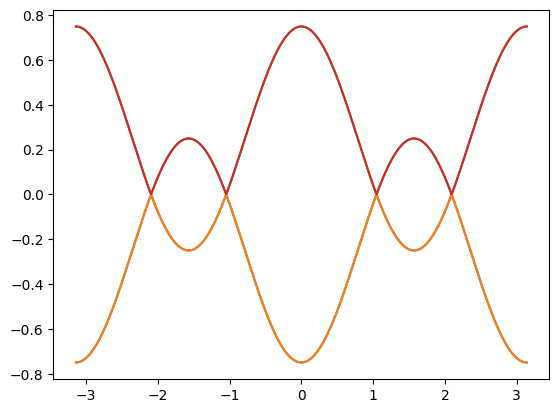

In [3]:
#Dispersion E for child hamiltonian from Parents 1 and 2 (below)  

# Parameters
mp, tp = 0.1, 0
g1, g2 = 0.5, -0.5

kx, ky = 0, 0
kzs = np.linspace(-np.pi,np.pi, 1001)

t_matrix = np.array ([[1,1],[1,1],[1,1]],dtype=complex)

# MCI Constants
hp_constant = mp*(tau_z*sigma_z+ tau_z*I2+tau_0*sigma_z+tau_x*sigma_z+tau_y*I2)
hp = 2*tp*np.cos(kx)*tau_y*sigma_y

# Parent WSM Hamiltonians 
evals_child = []
for kz in kzs:
    H_P1 = t_matrix[0][0]*np.sin(kx)*tau_x+t_matrix[1][0]*np.sin(ky)*tau_y+t_matrix[2][0]*(2+g1-np.cos(kx)-np.cos(ky)-np.cos(kz))*tau_z
    H_P2 = -t_matrix[0][1]*np.sin(kx)*sigma_x+t_matrix[1][1]*np.sin(ky)*sigma_y-t_matrix[2][1]*(2+g2-np.cos(kx)-np.cos(ky)-np.cos(kz))*sigma_z

    H_child = np.kron (H_P1, H_P2)

    eigenvals_child = np.linalg.eigvalsh(H_child)
    evals_child.append (eigenvals_child)

plt.plot (kzs, evals_child)
plt.xlabel ($K_z$)
plt.ylabel ($E$)
plt.title ("E vs $K_z$ for Child Hamiltonian")
plt.show ()

In [ ]:
#Slab spectra - OBC in x direction
#Parameters

L = 80
kzs = np.linspace(-np.pi,np.pi, 1001)
ky = 0


#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:
    H_P10 = t_matrix[1][0]*np.sin(ky)*tau_y+t_matrix[2][0]*(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    V_P10 = t_matrix[0][0]*(-1j/2)*tau_x-t_matrix[2][0]*(1/2)*tau_z
  
    HP1_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
        if i < L - 1:
            HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
            HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T

    H_P20 = t_matrix[1][1]*np.sin(ky)*sigma_y-t_matrix[2][1]*(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    V_P20 = -t_matrix[0][1]*(-1j/2)*sigma_x+t_matrix[2][1]*(1/2)*sigma_z

    HP2_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
        if i < L - 1:
            HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
            HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T

    H_child_open = np.kron(HP1_open, HP2_open)
    eigenvals_oc_child = np.linalg.eigvalsh(H_child_open)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T
#child_reshaped = child_eigvals_oc_vs_kz.reshape(20**2, 1001)

#plot
fig, ax = plt.subplots(figsize=(8,6))
for b in range(child_eigvals_oc_vs_kz.shape[0]):
    ax.plot(kzs, child_eigvals_oc_vs_kz[b], color='black', linewidth=0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM - OBC in y direction')

ax.set_ylim (-2,2)

plt.show()


# Parent 1

In [ ]:
mp = 0.1
tp = 0

g1 = 0.5
g2 = -0.5

t_matrix = np.array ([[1,1],[1,1],[1,1]],dtype=complex)

#OBC in x direction
L = 40
kzs = np.linspace(-np.pi,np.pi, 99)
ky = 0

#Slab spectra 
#Hamiltonian and diagonalization
P1_eigvals_oc_vs_kz = []
for kz in kzs:
    H_P10 = t_matrix[1][0]*np.sin(ky)*tau_y+t_matrix[2][0]*(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    V_P10 = t_matrix[0][0]*(-1j/2)*tau_x-t_matrix[2][0]*(1/2)*tau_z
  
    HP1_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
        if i < L - 1:
            HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
            HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T
    
    P1_eigenvals_oc = np.linalg.eigvalsh(HP1_open)      
    P1_eigvals_oc_vs_kz.append(P1_eigenvals_oc)


P1_eigvals_oc_vs_kz = np.array(P1_eigvals_oc_vs_kz).T

#Plot
plt.figure(figsize=(8,6))
for band in P1_eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, P1_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()


# Parent 2

In [ ]:
# Parameters
mp = 0.1
tp = 0

g1 = 0.5
g2 = -0.5

t_matrix = np.array ([[1,1],[1,1],[1,1]],dtype=complex)

#OBC in x direction
L = 40
kzs = np.linspace(-np.pi,np.pi, 99)
ky = 0


#Slab spectra
#Hamiltonian and diagonalization
P2_eigvals_oc_vs_kz = []
for kz in kzs:
    H_P20 = t_matrix[1][1]*np.sin(ky)*sigma_y-t_matrix[2][1]*(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    V_P20 = -t_matrix[0][1]*(-1j/2)*sigma_x+t_matrix[2][1]*(1/2)*sigma_z

    HP2_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
        if i < L - 1:
            HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
            HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T

   
    P2_eigenvals_oc = np.linalg.eigvalsh(HP2_open)      
    P2_eigvals_oc_vs_kz.append(P2_eigenvals_oc)


P2_eigvals_oc_vs_kz = np.array(P2_eigvals_oc_vs_kz).T

#Plot
plt.figure(figsize=(8,6))
for band in P2_eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, P2_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()